In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [21]:
variables = ['A2', 'A3', 'A8', 'A11', 'A14', 'A15', 'A16']

data = pd.read_csv('creditApprovalUCI.csv', usecols=variables)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('A16', axis=1), data['A16'], test_size=0.3, random_state=0)

In [26]:
imputer = IterativeImputer(estimator=BayesianRidge(), max_iter=10, random_state=0)

In [27]:
imputer.fit(X_train)

IterativeImputer(estimator=BayesianRidge(), random_state=0)

In [28]:
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor

In [31]:
variables = ['A2', 'A3', 'A8', 'A11', 'A14', 'A15', 'A16']
data = pd.read_csv('creditApprovalUCI.csv', usecols=variables)

X_train, X_test, y_train, y_test = train_test_split(data.drop('A16', axis=1), data['A16'], test_size=0.3, random_state=0)

In [34]:
imputer_bayes = IterativeImputer(estimator=BayesianRidge(),
                                 max_iter=10,
                                 random_state=0)

imputer_knn = IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=5),
                               max_iter=10,
                               random_state=0)

imputer_nonLin = IterativeImputer(
    estimator=DecisionTreeRegressor(max_features='sqrt', random_state=0),
    max_iter=10,
    random_state=0)

imputer_missForest = IterativeImputer(
    estimator=ExtraTreesRegressor(
        n_estimators=10,
        random_state=0),
    max_iter=10,
    random_state=0)

In [35]:
imputer_bayes.fit(X_train)
imputer_knn.fit(X_train)
imputer_nonLin.fit(X_train)
imputer_missForest.fit(X_train)

/home/ajay/miniconda/envs/feature_engineering/lib/python3.7/site-packages/sklearn/impute/_iterative.py:686: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
/home/ajay/miniconda/envs/feature_engineering/lib/python3.7/site-packages/sklearn/impute/_iterative.py:686: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=10, random_state=0),
                 random_state=0)

In [36]:
X_train_bayes = imputer_bayes.transform(X_train)
X_train_knn = imputer_knn.transform(X_train)
X_train_nonLin = imputer_knn.transform(X_train)
X_train_missForest = imputer_missForest.transform(X_train)

In [37]:
predictors = [var for var in variables if var != 'A16']

X_train_bayes = pd.DataFrame(X_train_bayes, columns = predictors)
X_train_knn = pd.DataFrame(X_train_knn, columns = predictors)
X_train_nonLin = pd.DataFrame(X_train_nonLin, columns = predictors)
X_train_missForest = pd.DataFrame(X_train_missForest, columns = predictors)

In [41]:
import matplotlib.pyplot as plt
# sns.set(style="ticks", context="talk")
# sns.set_style("darkgrid")
plt.style.use('Solarize_Light2')

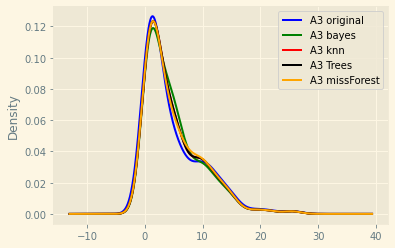

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['A3'].plot(kind='kde', ax=ax, color='blue')
X_train_bayes['A3'].plot(kind='kde', ax=ax, color='green')
X_train_knn['A3'].plot(kind='kde', ax=ax, color='red')
X_train_nonLin['A3'].plot(kind='kde', ax=ax, color='black')
X_train_missForest['A3'].plot(kind='kde', ax=ax, color='orange')

# add legends
lines, labels = ax.get_legend_handles_labels()
labels = ['A3 original', 'A3 bayes', 'A3 knn', 'A3 Trees', 'A3 missForest']
ax.legend(lines, labels, loc='best')
plt.show()